In [61]:
import torch
import matplotlib.pyplot as plt
A=8
W=1
qat_acc = []
qavat_acc = []
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    basemodel = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
    VAmodel = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
    basemodel_res = torch.load(basemodel)
    VAmodel_res = torch.load(VAmodel)
    print("noise %s"%noise)
    print("QAT %.4f"%(basemodel_res['mean_acc']))
    print("QAT+VAT %.4f"%(VAmodel_res['mean_acc']))
    print("")
    qat_acc.append(basemodel_res['mean_acc'])
    qavat_acc.append(VAmodel_res['mean_acc'])

noise 0.1
QAT 0.8811
QAT+VAT 0.8784

noise 0.2
QAT 0.8721
QAT+VAT 0.8693

noise 0.3
QAT 0.8544
QAT+VAT 0.8565

noise 0.4
QAT 0.8224
QAT+VAT 0.8361

noise 0.5
QAT 0.7711
QAT+VAT 0.8184



In [62]:
qat_acc[0]

0.8810626

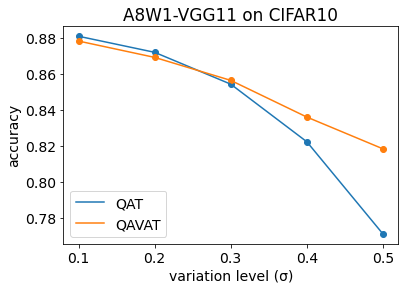

In [63]:
plt.rcParams.update({'font.size': 14})
plt.plot(noise_list,qat_acc,label='QAT')
plt.scatter(noise_list,qat_acc)
plt.plot(noise_list,qavat_acc,label='QAVAT')
plt.scatter(noise_list,qavat_acc)
plt.title('A%sW%s-VGG11 on CIFAR10'%(A,W))
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('A%sW%s-VGG11.pdf'%(A,W))
plt.show()

noise 0.1
A5W1 0.8676

noise 0.1
A5W4 0.8856

noise 0.1
A8W1 0.8811

noise 0.1
A8W4 0.8998

noise 0.2
A5W1 0.8585

noise 0.2
A5W4 0.8608

noise 0.2
A8W1 0.8721

noise 0.2
A8W4 0.8845

noise 0.3
A5W1 0.8411

noise 0.3
A5W4 0.8080

noise 0.3
A8W1 0.8544

noise 0.3
A8W4 0.8480

noise 0.4
A5W1 0.8090

noise 0.4
A5W4 0.7229

noise 0.4
A8W1 0.8224

noise 0.4
A8W4 0.7889

noise 0.5
A5W1 0.7609

noise 0.5
A5W4 0.6155

noise 0.5
A8W1 0.7711

noise 0.5
A8W4 0.7080



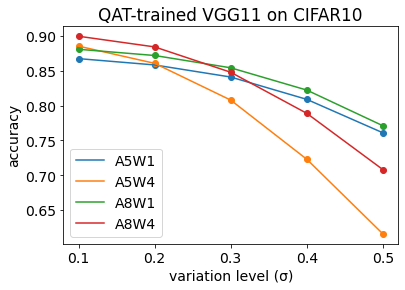

In [58]:
A_list=[5,8]
W_list=[1,4]
A_Ws = [(5,1),(5,4),(8,1),(8,4)]
acc_listOflist=[[] for _ in A_Ws]
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    for i in range(len(A_Ws)):
        A,W = A_Ws[i]
        model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
        model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
        model_res = torch.load(model)
        print("noise %s"%noise)
        print("A%sW%s %.4f"%(A,W,model_res['mean_acc']))
        print("")
        acc_listOflist[i].append(model_res['mean_acc'])
plt.rcParams.update({'font.size': 14})        
for i in range(len(A_Ws)):
    A,W = A_Ws[i]
    plt.plot(noise_list,acc_listOflist[i],label='A%sW%s'%(A,W))
    plt.scatter(noise_list,acc_listOflist[i])

plt.title('QAT-trained VGG11 on CIFAR10')
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('QAT_robust_trend.pdf')
plt.show()

    